In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skewtest

In [15]:
import pandas as pd

data = pd.read_csv("/Users/tomcooklin/Desktop/subset.csv")

data = data.iloc[: , 1:]

data = data.rename(columns={"REGION.x": "REGION", "ST.x": "ST", "ADJINC.x": "ADJINC", "PUMA.x": "PUMA"})

data.head()

,SERIALNO,REGION,ST,HINCP,ADJINC,WGTP,PWGTP,AGEP,RAC1P,RAC2P,RACBLK,RACWHT,RELSHIPP,SEX,PINCP,PUMA,INCOME
0,2021GQ0000001,4.0,4.0,NaN,1029928.0,0.0,35.0,36.0,1.0,1.0,0.0,1.0,37.0,1.0,1050.0,800.0,1081.4244
1,2021GQ0000002,2.0,26.0,NaN,1029928.0,0.0,35.0,19.0,1.0,1.0,0.0,1.0,38.0,1.0,3000.0,1002.0,3089.7840
2,2021GQ0000003,2.0,39.0,NaN,1029928.0,0.0,70.0,57.0,1.0,1.0,0.0,1.0,37.0,1.0,9300.0,1802.0,9578.3304
3,2021GQ0000005,4.0,6.0,NaN,1029928.0,0.0,177.0,26.0,1.0,1.0,0.0,1.0,38.0,1.0,15000.0,3741.0,15448.9200
4,2021GQ0000006,4.0,6.0,NaN,1029928.0,0.0,14.0,80.0,1.0,1.0,0.0,1.0,37.0,2.0,14800.0,11102.0,15242.9344


## Determing whether to use mean income or median income

In [60]:
def round_to_nearest_1000(x):
    return round(x/1000) * 1000

data = data[data['INCOME'].notna()]

data['rounded_income'] = data['INCOME'].apply(round_to_nearest_1000)

In [61]:
max(data["INCOME"])

1652725.4616

In [62]:
skewtest(data.dropna()["INCOME"])

SkewtestResult(statistic=1241.8421776538673, pvalue=0.0)

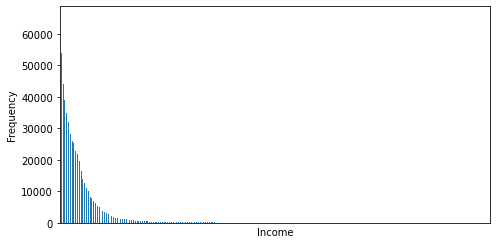

In [64]:
plt.rcParams["figure.figsize"] = [7, 3.5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

data['rounded_income'].value_counts().plot(ax=ax, kind='bar', xlabel='Income', ylabel='Frequency')

plt.xticks([]) 

plt.show()

Since income is skewed, it is best to use median.

In [22]:
# wm = lambda x: np.average(x, weights=data.loc[x.index, "PWGTP"])
# pincp_data = data.groupby(["PUMA"]).agg(WGTP=("PWGTP", "sum"), weighted_mean=("PINCP", wm))

pincp_data = data.groupby('PUMA').agg({'INCOME':np.median}).reset_index()

pincp_data.head()

,PUMA,INCOME
0,100.0,30897.840
1,101.0,33987.624
2,102.0,41197.120
3,103.0,41197.120
4,104.0,35017.552


In [23]:
pincp_data.rename(columns={"INCOME": "income_median_PUMA"}, inplace = True)

pincp_data.head()

,PUMA,income_median_PUMA
0,100.0,30897.840
1,101.0,33987.624
2,102.0,41197.120
3,103.0,41197.120
4,104.0,35017.552


In [24]:
data = data.merge(pincp_data, on='PUMA', how='left')

data.head()

,SERIALNO,REGION,ST,HINCP,ADJINC,WGTP,PWGTP,AGEP,RAC1P,RAC2P,RACBLK,RACWHT,RELSHIPP,SEX,PINCP,PUMA,INCOME,rounded_income,income_median_PUMA
0,2021GQ0000001,4.0,4.0,NaN,1029928.0,0.0,35.0,36.0,1.0,1.0,0.0,1.0,37.0,1.0,1050.0,800.0,1081.4244,0,30897.8400
1,2021GQ0000002,2.0,26.0,NaN,1029928.0,0.0,35.0,19.0,1.0,1.0,0.0,1.0,38.0,1.0,3000.0,1002.0,3089.7840,0,36047.4800
2,2021GQ0000003,2.0,39.0,NaN,1029928.0,0.0,70.0,57.0,1.0,1.0,0.0,1.0,37.0,1.0,9300.0,1802.0,9578.3304,10000,38519.3072
3,2021GQ0000005,4.0,6.0,NaN,1029928.0,0.0,177.0,26.0,1.0,1.0,0.0,1.0,38.0,1.0,15000.0,3741.0,15448.9200,20000,23688.3440
4,2021GQ0000006,4.0,6.0,NaN,1029928.0,0.0,14.0,80.0,1.0,1.0,0.0,1.0,37.0,2.0,14800.0,11102.0,15242.9344,20000,39291.7532


In [26]:
data["income_percent"] = data["INCOME"] / data["income_median_PUMA"]

data.head()

,SERIALNO,REGION,ST,HINCP,ADJINC,WGTP,PWGTP,AGEP,RAC1P,RAC2P,RACBLK,RACWHT,RELSHIPP,SEX,PINCP,PUMA,INCOME,rounded_income,income_median_PUMA,income_percent
0,2021GQ0000001,4.0,4.0,NaN,1029928.0,0.0,35.0,36.0,1.0,1.0,0.0,1.0,37.0,1.0,1050.0,800.0,1081.4244,0,30897.8400,0.035000
1,2021GQ0000002,2.0,26.0,NaN,1029928.0,0.0,35.0,19.0,1.0,1.0,0.0,1.0,38.0,1.0,3000.0,1002.0,3089.7840,0,36047.4800,0.085714
2,2021GQ0000003,2.0,39.0,NaN,1029928.0,0.0,70.0,57.0,1.0,1.0,0.0,1.0,37.0,1.0,9300.0,1802.0,9578.3304,10000,38519.3072,0.248663
3,2021GQ0000005,4.0,6.0,NaN,1029928.0,0.0,177.0,26.0,1.0,1.0,0.0,1.0,38.0,1.0,15000.0,3741.0,15448.9200,20000,23688.3440,0.652174
4,2021GQ0000006,4.0,6.0,NaN,1029928.0,0.0,14.0,80.0,1.0,1.0,0.0,1.0,37.0,2.0,14800.0,11102.0,15242.9344,20000,39291.7532,0.387942


## Modelling Section

In [27]:
data.isna().sum()

SERIALNO                   0
REGION                     0
ST                         0
HINCP                 101626
ADJINC                     0
WGTP                       0
PWGTP                      0
AGEP                       0
RAC1P                      0
RAC2P                      0
RACBLK                     0
RACWHT                     0
RELSHIPP                   0
SEX                        0
PINCP                      0
PUMA                       0
INCOME                     0
rounded_income             0
income_median_PUMA         0
income_percent             0
dtype: int64

In [28]:
from statsmodels.formula.api import ols

data2=data.dropna(subset=['AGEP', 'RACBLK', 'RACWHT', 'SEX', 'income_percent'])

X = data2[['AGEP', 'RACBLK', 'RACWHT', 'SEX']]
y = data2[['income_percent']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = ols(formula='income_percent ~ AGEP + RACBLK + RACWHT + SEX', data=data2)
print(type(model))

<class 'statsmodels.regression.linear_model.OLS'>


In [29]:
model = model.fit()
print(type(model))
print(model.summary() )

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
                            OLS Regression Results                            
Dep. Variable:         income_percent   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                 2.055e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:03:40   Log-Likelihood:            -4.9414e+06
No. Observations:             2388259   AIC:                         9.883e+06
Df Residuals:                 2388254   BIC:                         9.883e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [30]:
modelpredictions = pd.DataFrame( columns=['income_percentLM'], data= model.predict(data2)) 

In [31]:
print(modelpredictions.shape)

(2388259, 1)


In [32]:
print(modelpredictions.head())

   income_percentLM
0          1.787551
1          1.688908
2          1.909405
3          1.729526
4          1.424986


# Community Approach

In [33]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

grouped = data.groupby(['PUMA'])

gini_index = grouped['INCOME'].apply(gini).reset_index()

gini_index.rename(columns={"INCOME": "gini_index"}, inplace = True)

gini_index.head()

,PUMA,gini_index
0,100.0,0.510670
1,101.0,0.589754
2,102.0,0.538226
3,103.0,0.557650
4,104.0,0.500416


In [34]:
com2 = data[['PUMA', 'RAC1P', 'income_percent']]

com2 = com2.groupby(['PUMA', 'RAC1P'])['RAC1P'].sum().rename("PER").groupby(level = 0).transform(lambda x: x/x.sum()).reset_index()

com2.head()

,PUMA,RAC1P,PER
0,100.0,1.0,0.426683
1,100.0,2.0,0.033599
2,100.0,3.0,0.058927
3,100.0,4.0,0.000579
4,100.0,5.0,0.007288


In [35]:
com2 = pd.pivot(com2, index=['PUMA'], columns = 'RAC1P',values = 'PER')

com2.head()

RAC1P,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
PUMA,,,,,,,,,
100.0,0.426683,0.033599,0.058927,0.000579,0.007288,0.071271,0.018598,0.072201,0.310855
101.0,0.301102,0.077715,0.005551,0.004486,0.001402,0.142477,0.008831,0.139505,0.318932
102.0,0.291871,0.084160,0.005174,0.005682,0.001522,0.143209,0.005327,0.148941,0.314115
103.0,0.269454,0.075840,0.011487,0.000618,0.002007,0.128211,0.002810,0.172184,0.337389
104.0,0.258462,0.150742,0.004635,NaN,0.002809,0.085951,0.001639,0.230326,0.265437


In [42]:
com = pd.merge(gini_index, com2,  how='left', left_on=['PUMA'], right_on = ['PUMA'])

com = com.dropna()

com.sort_values(by=['PUMA'])

,PUMA,gini_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,100.0,0.510670,0.426683,0.033599,0.058927,0.000579,0.007288,0.071271,0.018598,0.072201,0.310855
1,101.0,0.589754,0.301102,0.077715,0.005551,0.004486,0.001402,0.142477,0.008831,0.139505,0.318932
2,102.0,0.538226,0.291871,0.084160,0.005174,0.005682,0.001522,0.143209,0.005327,0.148941,0.314115
3,103.0,0.557650,0.269454,0.075840,0.011487,0.000618,0.002007,0.128211,0.002810,0.172184,0.337389
5,105.0,0.526840,0.278919,0.077118,0.003951,0.000421,0.003161,0.216498,0.008850,0.132322,0.278761
...,...,...,...,...,...,...,...,...,...,...,...
888,11704.0,0.515026,0.250196,0.026667,0.004118,0.000784,0.003922,0.281176,0.002745,0.128627,0.301765
891,11801.0,0.535757,0.352902,0.009340,0.068045,0.004003,0.008339,0.118079,0.004670,0.077385,0.357238
893,11900.0,0.476528,0.437467,0.005322,0.084619,0.002129,0.005322,0.044705,0.007451,0.068121,0.344864
920,49001.0,0.509429,0.531288,0.002454,0.011043,0.002454,0.003067,0.044172,0.008589,0.093252,0.303681


In [43]:
for col in com.columns:
    print(col)

PUMA
gini_index
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


In [44]:
com.rename(columns={1.0: "white", 2.0: "afr", 3.0: "ind", 4.0: "alask", 5.0: "ind_nat", 6.0: "asian", 7.0: "hawaii", 8.0: "other", 9.0: "two"}, inplace = True)

com.head()

,PUMA,gini_index,white,afr,ind,alask,ind_nat,asian,hawaii,other,two
0,100.0,0.510670,0.426683,0.033599,0.058927,0.000579,0.007288,0.071271,0.018598,0.072201,0.310855
1,101.0,0.589754,0.301102,0.077715,0.005551,0.004486,0.001402,0.142477,0.008831,0.139505,0.318932
2,102.0,0.538226,0.291871,0.084160,0.005174,0.005682,0.001522,0.143209,0.005327,0.148941,0.314115
3,103.0,0.557650,0.269454,0.075840,0.011487,0.000618,0.002007,0.128211,0.002810,0.172184,0.337389
5,105.0,0.526840,0.278919,0.077118,0.003951,0.000421,0.003161,0.216498,0.008850,0.132322,0.278761


In [45]:
model = ols(formula='gini_index ~ white + afr + ind + alask + ind_nat + asian + hawaii + other + two', data=com)
print(type(model))

<class 'statsmodels.regression.linear_model.OLS'>


In [46]:
model = model.fit()
print(type(model))
print(model.summary())

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
                            OLS Regression Results                            
Dep. Variable:             gini_index   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.045
Date:                Wed, 08 Mar 2023   Prob (F-statistic):             0.0508
Time:                        18:19:11   Log-Likelihood:                 211.51
No. Observations:                  92   AIC:                            -405.0
Df Residuals:                      83   BIC:                            -382.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Does not yield any useful information which makes sense. We should not expect to that with the percentage of black individuals increasing in a community, the income inequality to increase. Whilst this community may have a lower income, this doesn't infer that the income is distributed unevenly. Another question might be: what racial composition of a community has the most income inequality?